In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [20]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [21]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_1/  README.md


Read data from CSV and check what is inside

In [22]:
df = pd.read_csv("data/shoes_prices.csv", low_memory=False)
df.shape

(18280, 48)

In [23]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

Basics stats and prediction

In [26]:
mean_price = np.mean(df["prices_amountmin"])
mean_price

93.53952188183217

In [29]:
   y_true = df["prices_amountmin"]
   y_true.shape[0]

18280

MEAN

In [30]:
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

63.968341227870624

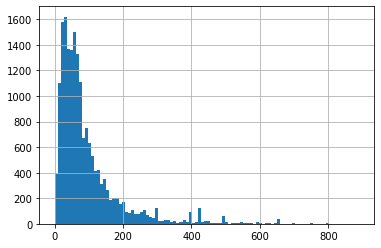

In [32]:
df.prices_amountmin.hist(bins=100);

To avoid log of 0 use 

`np.log1p == np.log(x+1)` 

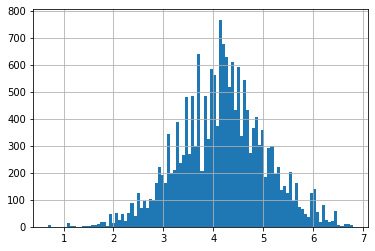

In [34]:
np.log1p(df.prices_amountmin+1).hist(bins=100);

MEDIAN

In [37]:
price_median = np.median(df["prices_amountmin"])
y_pred = [price_median] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

LOG MEAN

In [39]:
 price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) ) 
 y_pred = [price_log_mean] * y_true.shape[0]  
mean_absolute_error(y_true, y_pred)

58.03539547661041

   Decision tree
  

In [40]:
   df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [41]:
df.brand.value_counts()

Nike            1709
PUMA             574
Ralph Lauren     524
New Balance      361
VANS             356
                ... 
Navali             1
POC                1
Cammie             1
Fat Doxie          1
LUYIVARI           1
Name: brand, Length: 1856, dtype: int64

String data must me normalized to Integer

In [0]:
df['brand_cat'] = df.brand.factorize()[0]

In [52]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

score = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(score), np.std(score)

(-58.38655694633361, 4.223555478221712)

Define funcion

In [0]:
def run_model(feats):
  X = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  score = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(score), np.std(score)

In [55]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['colors_cat'] = df.colors.factorize()[0]

In [60]:
run_model(['colors_cat'])

(-62.72404880129134, 5.053649873215771)

In [61]:
run_model(['brand_cat', 'colors_cat'])

(-61.44600582128212, 5.444747383187684)

In [62]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_1/  README.md


In [63]:
!git add matrix_1/day4.ipynb
!git commit -m "First ML model"
!git push -u origin master


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@3138ba751a14.(none)')
Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
